In [339]:
%pwd

'C:\\Users\\Rajat\\Machine Learning\\machine-learning-ex\\machine-learning-ex'

In [340]:
import  numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [341]:
train = pd.read_csv('School_train_data.csv')
test = pd.read_csv('School_test_user.csv')
print(train.shape)
print(test.shape)

(993, 32)
(51, 31)


In [342]:
data = pd.concat([train,test],join = 'outer')

In [343]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [344]:
#Rearranging the columns
data = data[['id','school','sex', 'age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian',
             'traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet',
             'romantic','famrel','freetime','goout','Dalc','Walc','health','absences','Result']]

In [345]:
#replace NAN with FAIL
data['Result'] = data['Result'].replace(np.nan, 'FAIL', regex=True)
#display(data)

In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 50
Data columns (total 32 columns):
id            1044 non-null int64
school        1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-null 

In [5]:
test['schoolsup'].value_counts()


no    51
Name: schoolsup, dtype: int64

In [6]:
train['schoolsup'].value_counts()

no     874
yes    119
Name: schoolsup, dtype: int64

In [347]:
numerical = ['age','absences']

In [348]:
categorical = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health','Result']

In [349]:
#emp_attr[cat_cols] = emp_attr[cat_cols].astype("category")
for col in categorical:
    data[col] = data[col].astype('category')

In [350]:
for col in numerical:
    data[col] = data[col].astype('float64')

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 50
Data columns (total 32 columns):
id            1044 non-null int64
school        1044 non-null category
sex           1044 non-null category
age           1044 non-null float64
address       1044 non-null category
famsize       1044 non-null category
Pstatus       1044 non-null category
Medu          1044 non-null category
Fedu          1044 non-null category
Mjob          1044 non-null category
Fjob          1044 non-null category
reason        1044 non-null category
guardian      1044 non-null category
traveltime    1044 non-null category
studytime     1044 non-null category
failures      1044 non-null category
schoolsup     1044 non-null category
famsup        1044 non-null category
paid          1044 non-null category
activities    1044 non-null category
nursery       1044 non-null category
higher        1044 non-null category
internet      1044 non-null category
romantic      1044 non-null category
famrel     

In [351]:
#Missing values and missing values treatment
print(data.isnull().sum())

id            0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
Result        0
dtype: int64


In [102]:
#Correlation matrix
rows, cols =train.shape
flds = list(train.columns)

# Indexing with numbers on a numpy matrix will probably be faster
corr = train.corr().values

In [352]:
#Chi-Square relationship among categorical features
from scipy.stats import chi2_contingency
factors_paired = [(i,j) for i in categorical for j in categorical]
chi2, p_values = [], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(train[f[0]], train[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)
        
p1 = np.array(p_values).reshape((29,29))
p1 = pd.DataFrame(p1.round(2), index=categorical, columns=categorical)
p1

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,Result
school,0.00,0.09,0.00,0.38,0.46,0.00,0.00,0.00,0.00,0.00,0.34,0.00,0.00,0.00,0.00,0.13,0.00,0.01,0.87,0.00,0.00,0.12,0.03,0.00,0.07,0.06,0.29,0.72,0.00
sex,0.09,0.00,0.85,0.00,0.21,0.01,0.07,0.00,0.20,0.26,0.33,0.20,0.00,0.11,0.00,0.00,0.60,0.00,0.74,0.01,0.06,0.00,0.04,0.00,0.18,0.00,0.00,0.00,0.19
address,0.00,0.85,0.00,0.13,0.01,0.00,0.00,0.00,0.18,0.00,0.79,0.00,0.01,0.07,0.75,0.98,0.07,0.65,0.52,0.02,0.00,0.66,0.82,0.03,0.26,0.02,0.31,0.86,0.00
famsize,0.38,0.00,0.13,0.00,0.00,0.26,0.19,0.43,0.09,0.67,0.88,0.46,0.01,0.44,0.19,0.08,0.60,0.95,0.00,0.93,0.96,0.67,0.73,0.30,0.89,0.00,0.09,0.99,0.90
Pstatus,0.46,0.21,0.01,0.00,0.00,0.00,0.07,0.16,0.09,0.44,0.00,0.47,0.08,0.22,0.60,0.93,0.29,0.00,0.20,0.97,0.12,0.34,0.12,0.02,0.57,0.32,0.02,0.14,0.48
Medu,0.00,0.01,0.00,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.00,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.39,0.39,0.81,0.06,0.07,0.11,0.00
Fedu,0.00,0.07,0.00,0.19,0.07,0.00,0.00,0.00,0.00,0.10,0.02,0.00,0.02,0.00,0.41,0.00,0.01,0.02,0.00,0.00,0.00,0.01,0.98,0.25,0.73,0.21,0.01,0.00,0.00
Mjob,0.00,0.00,0.00,0.43,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.93,0.01,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.04,0.01,0.02,0.28,0.67,0.10,0.00
Fjob,0.00,0.20,0.18,0.09,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.36,0.01,0.03,0.68,0.22,0.19,0.15,0.06,0.86,0.01,0.17,0.14,0.11,0.00,0.22,0.01
reason,0.00,0.26,0.00,0.67,0.44,0.00,0.10,0.00,0.00,0.00,0.33,0.00,0.00,0.06,0.47,0.01,0.00,0.00,0.50,0.00,0.00,0.19,0.13,0.03,0.66,0.00,0.31,0.00,0.00


From the above table we observe various p-values for features. If p-value is > .05 and <.01 the features are dependent, else the features are independent of each other. In other words, if p-value lies in the range of (0.01-0.05) it accepts the null hypothesis else rejects it.

In [353]:
from sklearn.preprocessing import LabelEncoder
# target column
tgt_col = ['Result']
# Categorical cols

category_names = data.nunique()[data.nunique() < 7].keys().tolist()
category_names = [x for x in category_names if x not in tgt_col]

#numerical Cols
num_cols = [i for i in data.columns if i not in category_names + tgt_col]

#Binary cols
bin_cols = data.nunique()[data.nunique()==2].keys().tolist()

# Multi-cols
multi_cols = [i for i in category_names if i not in bin_cols]

#label Encoding
le = LabelEncoder()
for i in bin_cols:
    data[i] = le.fit_transform(data[i])
     
# Duplicating cols for multi-value columns
data = pd.get_dummies(data=data, columns=multi_cols)
data.head()
#print(len(num_cols))
#print(len(category_names))
#print(len(bin_cols))
#print(len(multi_cols))

,id,school,sex,age,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,absences,Result,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,traveltime_1,traveltime_2,traveltime_3,traveltime_4,studytime_1,studytime_2,studytime_3,studytime_4,failures_0,failures_1,failures_2,failures_3,famrel_1,famrel_2,famrel_3,famrel_4,famrel_5,freetime_1,freetime_2,freetime_3,freetime_4,freetime_5,goout_1,goout_2,goout_3,goout_4,goout_5,Dalc_1,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5
0,1,0,0,18.0,1,0,0,1,0,0,0,1,1,0,0,6.0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,2,0,0,17.0,1,0,1,0,1,0,0,0,1,1,0,4.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,0,0,15.0,1,1,1,1,0,1,0,1,1,1,0,10.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,4,0,0,15.0,1,0,1,0,1,1,1,1,1,1,1,2.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,5,0,0,16.0,1,0,1,0,1,1,0,1,1,0,0,4.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [112]:
train['age'].value_counts()

16    281
17    262
15    194
18    191
19     51
20      9
21      3
22      2
Name: age, dtype: int64

In [354]:
cont_features = []
for features in data.select_dtypes(include=['float64']):
    cont_features.append(features)

In [355]:
#normalizing feATURES
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data[cont_features] = minmax.fit_transform(data[cont_features].values)

In [356]:
cols = [i for i in data.columns if i not in 'Result']
X = data[cols]
Y = pd.DataFrame(data['Result'])

In [358]:
X.columns

Index(['id', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'absences', 'Medu_0', 'Medu_1', 'Medu_2',
       'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 'Fedu_2', 'Fedu_3', 'Fedu_4',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'traveltime_1', 'traveltime_2',
       'traveltime_3', 'traveltime_4', 'studytime_1', 'studytime_2',
       'studytime_3', 'studytime_4', 'failures_0', 'failures_1', 'failures_2',
       'failures_3', 'famrel_1', 'famrel_2', 'famrel_3', 'famrel_4',
       'famrel_5', 'freetime_1', 'freetime_2', 'freetime_3', 'freetime_4',
       'freetime_5', 'goout_1', 'goout_2', 'goout_3', 'goout_4', 'g

In [359]:
X_train = X.iloc[:993,:]
Y_train = Y.iloc[:993,:]
X_test = X.iloc[993:,:]
Y_test = Y.iloc[993:,:]

In [360]:
print(X_train.shape)

(993, 85)


In [361]:
print(Y_train.shape)

(993, 1)


In [362]:
print(X_test.shape)


(51, 85)


In [363]:
print(Y_test.shape)

(51, 1)


In [365]:
#drop ID column from train
X_train.drop(['id'], axis=1)

,school,sex,age,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,absences,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,traveltime_1,traveltime_2,traveltime_3,traveltime_4,studytime_1,studytime_2,studytime_3,studytime_4,failures_0,failures_1,failures_2,failures_3,famrel_1,famrel_2,famrel_3,famrel_4,famrel_5,freetime_1,freetime_2,freetime_3,freetime_4,freetime_5,goout_1,goout_2,goout_3,goout_4,goout_5,Dalc_1,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5
0,0,0,0.428571,1,0,0,1,0,0,0,1,1,0,0,0.080000,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0.285714,1,0,1,0,1,0,0,0,1,1,0,0.053333,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0.000000,1,1,1,1,0,1,0,1,1,1,0,0.133333,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0,0,0.000000,1,0,1,0,1,1,1,1,1,1,1,0.026667,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0.142857,1,0,1,0,1,1,0,1,1,0,0,0.053333,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5,0,1,0.142857,1,1,1,0,1,1,1,1,1,1,0,0.133333,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6,0,1,0.142857,1,1,1,0,0,0,0,1,1,1,0,0.000000,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
7,0,0,0.285714,1,0,0,1,1,0,0,1,1,0,0,0.080000,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
8,0,1,0.000000,1,1,0,0,1,1,0,1,1,1,0,0.000000,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
9,0,1,0.000000,1,0,1,0,1,1,1,1,1,1,0,0.000000,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [366]:
#Drop I d column from test 
X_test.drop(['id'], axis=1)

,school,sex,age,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,absences,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,traveltime_1,traveltime_2,traveltime_3,traveltime_4,studytime_1,studytime_2,studytime_3,studytime_4,failures_0,failures_1,failures_2,failures_3,famrel_1,famrel_2,famrel_3,famrel_4,famrel_5,freetime_1,freetime_2,freetime_3,freetime_4,freetime_5,goout_1,goout_2,goout_3,goout_4,goout_5,Dalc_1,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5
0,1,1,0.428571,1,1,1,0,1,0,0,0,1,0,0,0.106667,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
1,1,1,0.428571,0,0,1,0,1,1,1,1,1,1,1,0.066667,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,1,1,0.285714,0,0,1,0,0,0,0,0,0,0,0,0.053333,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0.428571,1,0,1,0,1,0,0,0,1,1,1,0.053333,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1,0,0.428571,1,1,1,0,0,0,0,1,1,1,1,0.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,1,0,0.428571,0,1,0,0,0,0,1,1,1,1,1,0.000000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6,1,0,0.428571,1,0,1,0,0,0,0,1,0,0,0,0.026667,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
7,1,0,0.571429,1,0,1,0,0,0,0,1,0,0,0,0.000000,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
8,1,0,0.285714,1,0,1,0,0,0,0,1,1,1,1,0.000000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
9,1,0,0.285714,0,1,0,0,0,0,1,1,1,1,1,0.066667,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [367]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [368]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [369]:
predicted = model.predict(X_test)

In [370]:
# Accuracy Score
from sklearn import metrics
print("Accuracy Score of Decision Tree Classifier : ",metrics.accuracy_score(Y_test, predicted))

Accuracy Score of Decision Tree Classifier :  0.529411764706


In [317]:
predicted
a =predicted.tolist()
a

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1]

In [371]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
# Define the parameter values that should be searched
sample_split_range = range(10,50,100)
param_grid = dict(min_samples_split=sample_split_range)

# Instantiate the grid
grid_dtc = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
# Fitting the model on hyper-tuning
grid_dtc.fit(X_train,Y_train)
grid_pred = grid_dtc.predict(X_test)

In [331]:
X_train.shape

(993, 85)

In [372]:
print("Accuracy Score of Decision Tree Classifier on Hyper-tuning : ",metrics.accuracy_score(Y_test, grid_pred))

Accuracy Score of Decision Tree Classifier on Hyper-tuning :  0.529411764706


In [321]:
b = grid_pred.tolist()

In [323]:
b

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1]

In [373]:
from sklearn.ensemble import RandomForestClassifier
# Create the model with 100 trees
model1 = RandomForestClassifier(n_estimators=500,bootstrap = True,max_features = 85 )
# Fit on training data
model1.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=85, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [374]:
# Actual class predictions
rf_predictions = model1.predict(X_test)

In [375]:
# Accuracy Score
from sklearn import metrics
print("Accuracy Score of Decision Tree Classifier : ",metrics.accuracy_score(Y_test,rf_predictions))

Accuracy Score of Decision Tree Classifier :  0.294117647059


In [380]:
c = rf_predictions.tolist()
c

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1]

In [377]:
from xgboost import XGBClassifier
from sklearn.metrics import *
clf = XGBClassifier()
clf.fit(X_train, Y_train)
y1 = clf.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(Y_test, y1)))

Accuracy: 0.373


In [382]:
d = y1.tolist()
d

[1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0]

In [261]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [212]:
!pip install xgboost

You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [262]:
# Define the parameter values that should be searched
sample_split_range = range(10,50,100)
param_grid = dict(min_samples_split=sample_split_range)

# Instantiate the grid
grid_dtc = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')

In [263]:
grid_dtc.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(10, 50, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [264]:
grid_pred = grid_dtc.predict(X_test)

In [265]:
display(grid_pred)

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1], dtype=int64)

In [197]:
grid_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [383]:
from sklearn.model_selection import KFold
# Create K-Folds
folds = KFold(n_splits=5, shuffle=True, random_state=0)

In [384]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [385]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC()
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
print("Accuracy Score : ")
print(accuracy_score(Y_test, y_pred))

Accuracy Score : 
0.0


In [192]:
print(X_train.columns)
print(X_test.columns)

Index(['id', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'absences', 'Result', 'Medu_0', 'Medu_1',
       'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 'Fedu_2', 'Fedu_3',
       'Fedu_4', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'traveltime_1', 'traveltime_2',
       'traveltime_3', 'traveltime_4', 'studytime_1', 'studytime_2',
       'studytime_3', 'studytime_4', 'failures_0', 'failures_1', 'failures_2',
       'failures_3', 'famrel_1', 'famrel_2', 'famrel_3', 'famrel_4',
       'famrel_5', 'freetime_1', 'freetime_2', 'freetime_3', 'freetime_4',
       'freetime_5', 'goout_1', 'goout_2', 'goout_3', 'go

In [220]:
logReg.fit(X_train, Y_train)

NameError: name 'logReg' is not defined

In [ ]:
# Predict labels for test data
y_pred = logReg.predict(X_test)

['Result',
 'schoolsup',
 'Fedu_0',
 'Mjob_health',
 'school',
 'failures_2',
 'Fjob_health',
 'Medu_0',
 'age']

In [133]:
X_test.shape
X_test.columns

Index(['id', 'sex', 'address', 'famsize', 'Pstatus', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'absences',
       'school_MS', 'age_17', 'age_18', 'age_19', 'Medu_1', 'Medu_2', 'Medu_3',
       'Medu_4', 'Fedu_1', 'Fedu_2', 'Fedu_3', 'Fedu_4', 'Mjob_at_home',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'traveltime_1', 'traveltime_2',
       'traveltime_3', 'traveltime_4', 'studytime_1', 'studytime_2',
       'studytime_3', 'studytime_4', 'failures_0', 'failures_1', 'failures_3',
       'schoolsup_no', 'famrel_1', 'famrel_2', 'famrel_3', 'famrel_4',
       'famrel_5', 'freetime_1', 'freetime_2', 'freetime_3', 'freetime_4',
       'freetime_5', 'goout_1', 'goout_2', 'goout_3', 'goout_4', 'goout_5',
       'Dalc_1', 'Dalc_2', 'Dalc_

In [122]:
logReg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [123]:
# Predict labels for test data
y_pred = logReg.predict(X_test)

ValueError: X has 82 features per sample; expecting 86

In [386]:
# Score method to get accuracy of model
# Algorithm 
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, Y_train)
# Predict labels for test data
y_pred = logReg.predict(X_test)
score = logReg.score(X_test,Y_test)
print("Accuracy score of model:",score.round(2))

Accuracy score of model: 0.27


In [388]:
y_pred.tolist()

[1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1]

In [390]:
Y_pred_proba = logReg.predict_proba(X_test)

In [391]:
Y_pred_proba

array([[ 0.46088616,  0.53911384],
       [ 0.15936576,  0.84063424],
       [ 0.50836468,  0.49163532],
       [ 0.44898291,  0.55101709],
       [ 0.33501853,  0.66498147],
       [ 0.23928719,  0.76071281],
       [ 0.91048977,  0.08951023],
       [ 0.95286552,  0.04713448],
       [ 0.12485858,  0.87514142],
       [ 0.25409911,  0.74590089],
       [ 0.3971333 ,  0.6028667 ],
       [ 0.75811124,  0.24188876],
       [ 0.97741954,  0.02258046],
       [ 0.09930855,  0.90069145],
       [ 0.5715626 ,  0.4284374 ],
       [ 0.33536704,  0.66463296],
       [ 0.21533942,  0.78466058],
       [ 0.10131743,  0.89868257],
       [ 0.32881091,  0.67118909],
       [ 0.28186067,  0.71813933],
       [ 0.38790345,  0.61209655],
       [ 0.34010689,  0.65989311],
       [ 0.12190742,  0.87809258],
       [ 0.12808435,  0.87191565],
       [ 0.79679155,  0.20320845],
       [ 0.09790706,  0.90209294],
       [ 0.57430224,  0.42569776],
       [ 0.29865615,  0.70134385],
       [ 0.0075572 ,

In [392]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [393]:
pred_proba_df = pd.DataFrame(logReg.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
precision_lst = []
recall_lst = []
for i in threshold_list:
    #print ('\n******** For threshold = {} ******'.format(i))
    
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    precision = precision_score(Y_test.as_matrix().reshape(Y_test.as_matrix().size,1),
                               (Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))
    precision_lst.append(precision)
    recall = recall_score(Y_test.as_matrix().reshape(Y_test.as_matrix().size,1),
                         (Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))
    recall_lst.append(recall)

In [394]:
thresh_df = pd.DataFrame()
thresh_df['Threshold'] = threshold_list
thresh_df['Precision'] = precision_lst
thresh_df['Recall'] = recall_lst

In [82]:
thresh_df

,Threshold,Precision,Recall
0,0.05,0.908654,1.000000
1,0.10,0.984375,1.000000
2,0.15,1.000000,1.000000
3,0.20,1.000000,1.000000
4,0.25,1.000000,1.000000
5,0.30,1.000000,1.000000
6,0.35,1.000000,1.000000
7,0.40,1.000000,1.000000
8,0.45,1.000000,1.000000
9,0.50,1.000000,1.000000


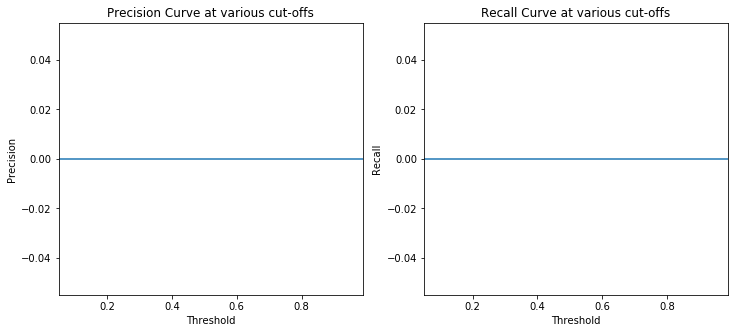

In [395]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, sharex=True,figsize=(12,5))

# Use ax1 to plot precision
thresh_df.plot(x='Threshold', y='Precision',legend=False, ax=ax1)
ax1.set_ylabel('Precision')
ax1.set_title("Precision Curve at various cut-offs")

# Use ax2 to plot recall
thresh_df.plot(x='Threshold',y='Recall',legend=False, ax=ax2)
ax2.set_ylabel('Recall')
ax2.set_title("Recall Curve at various cut-offs")

plt.show()

In [85]:
from sklearn.metrics import confusion_matrix

Confusion Matrix : [[14 37]
 [ 0  0]]


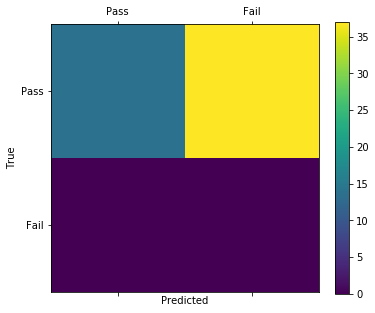

In [389]:
# Confusion Matrix
labels=['Pass','Fail']
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix :",conf_matrix)
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_matrix)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

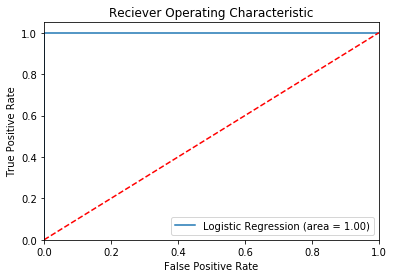

In [89]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(Y_test, y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Reciever Operating Characteristic")
plt.legend(loc='lower right')
plt.show()